<a href="https://colab.research.google.com/github/alinepriscillia/GSinNHoL/blob/main/Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gain shift in the nested hierarchies of language



## Getting started
This notebook provides all the scripts used to create the RSA models and set up the analysis.

In [ ]:
!pip install -U spacy
import spacy.cli
spacy.cli.download("nl_core_news_lg")
import nl_core_news_lg

     |████████████████████████████████| 12.8MB 279kB/s 
     |████████████████████████████████| 460kB 43.2MB/s 
     |████████████████████████████████| 9.1MB 41.1MB/s 
     |████████████████████████████████| 1.1MB 47.2MB/s 
     |████████████████████████████████| 51kB 5.1MB/s 
     |████████████████████████████████| 122kB 52.9MB/s 
  Created wheel for smart-open: filename=smart_open-3.0.0-cp37-none-any.whl size=107098 sha256=67c28ca1efd8a6c526c2a1b1ffccb54b0492258ff4b993a1eb96b1565989ab14
  Stored in directory: /root/.cache/pip/wheels/18/88/7c/f06dabd5e9cabe02d2269167bcacbbf9b47d0c0ff7d6ebcb78
Successfully built smart-open
  Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found e

Upload the audiobook text document, or the individual story transcripts.

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Audiobook.txt to Audiobook.txt


Whenever the words token or doc are referenced later in this notebook, the variables need to be generated from this section and the following cell in order for the code to work. (unless the text document is respecified). 



## Getting words and word numbers

In [ ]:
#change filenames to suit story
#this code is programmed to run on the whole audiobook 

from collections import Counter 

#word tokenizing and POS
nlp = spacy.load("nl_core_news_lg")
text = 'Audiobook.txt'
document = open(text).read()
doc = nlp(document)
words = [token.text for token in doc if token.pos_ == 'NOUN']
word_freq = Counter(words)
       

Save nouns, word positions and frequencies:

In [ ]:
# needs to be done per individual text
with open('grimm23_wordlist.txt','w') as file:
    file.writelines(['Word Frequencies: \n \n',str(word_freq),'\n \n', 'Words: \n \n'])
    wordnumber = 0
    with open('grimm23_nounlist.txt', 'w') as f: #change title of doc as needed
      for token in doc:
        wordnumber = wordnumber + 1
        if token.pos_ == 'NOUN':
            f.writelines([str(token.text), '\n'])
            file.writelines([str(token.text), ', ',  str(wordnumber), ', ', str(token.is_oov),'\n',]) #shows TRUE if out of vocab
            

## Extracting w2v

Load the library and the relevant text document uploaded to the files repository in colab.

In [ ]:
#change filename to suit final file/story
#uses Celex word file to extract vectors

import csv

with open('allphonemes.csv', newline='') as csvfile:
  data = csv.DictReader(csvfile)
  with open('allvectors.csv', 'a', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=['word', 'vector'])
    writer.writeheader()
    for row in data:
      for token in doc: 
        if row['Word'] == token.text:
            v = token.vector
            t = list(map(float, v))
            r = {'word': str(token.text), 'vector': t}
            writer.writerow(r)
            break
            

## Feature extraction

Download prosodic repo from github to read features.
Code is written in python2 and some parts need to be adapted to python3.



In [ ]:
# Clone prosodic repo.
!git clone -l -s git://github.com/jsfalk/prosodic1b.git
!ls
%cd prosodic1b/

Cloning into 'prosodic1b'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 54 (delta 7), reused 54 (delta 7), pack-reused 0
Receiving objects: 100% (54/54), 887.41 KiB | 16.43 MiB/s, done.
Resolving deltas: 100% (7/7), done.
allfeatures.csv  allphonemes.csv  earlywordinfo.csv  prosodic1b  sample_data
/content/prosodic1b


Upload edited modipa.py script. Modify phoneme.py in uploaded repository to refer to modipa and not ipa.

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving modipa.py to modipa.py


Extract features and save to .csv file

In [ ]:
#Get relevant functions
#Check the phonemes and add parentheses to ipa.py
#doesn't work with modified ipa

from Phoneme import Phoneme
from ipa import *
from ipa import phoneme_feature_string
import csv

filepath = '/content/draft.csv'
fieldnames = ['Phoneme', 'Features']
#features = all_features

with open('/content/allphonemes.csv', newline='') as csvfile:
  data = csv.DictReader(csvfile)
  with open(filepath, 'a', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for row in data:
      phon = row['IPA onset']
      if not len(phon) == 0:
        features = phoneme_feature_string(phon)
        myrow = {'Phoneme' : phon, 'Features' : features}
        writer.writerow(myrow)

Save all the features to a csv where each column represents the value for the feature. Essentially the same code as the previous snippet but each feature has its own column. 

In [ ]:
from Phoneme import Phoneme
from modipa import *
from modipa import ipa_to_features
import csv

filepath = '/content/allfeatures.csv'
fieldnames = ['phoneme', 'consonantal', 'sonorant', 'syllabic', 'labial', 'round', 'coronal', 'anterior', 'distributed', 'dorsal', 'high', 'low', 'front', 'back', 'tense', 'pharyngeal', 'ATR',  'voice', 'spread.gl', 'constr.gl','continuant', 'strident', 'lateral', 'delayed.release', 'nasal', 'diphthong']
features = all_features

with open('/content/allphonemes.csv', newline='') as csvfile:
  data = csv.DictReader(csvfile)
  with open(filepath, 'a', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for row in data:
      phon = row['IPA onset']
      myrow = {'Phoneme': phon}
      if not len(phon) == 0:
          dicts = { }
          keys = features
          for i in features:
            value = ipa_to_features[phon][i]
            dicts[i] = value
          myrow = {**myrow, **dicts}
          writer.writerow(myrow)

## Dissimilarity matrices

### Phonological model

Create vectors for each phoneme. The phonemes are not saved nor are the feature names. Consult the previously generated csv files for a key. Save variables via pickle if needed.

In [ ]:
import csv
from modipa import *
import pickle 

with open('/content/allfeatures.csv', newline='') as csvfile:
  data = csv.reader(csvfile)
  valuelist = [ ]
  featurematrix = [ ]
  next(data)
  
  for row in data:
      for x in range(1,24):
        feature = all_features[x-1]
        if row[x] == 'TRUE': #switch to 'True' if using internally generated csv file
          valuelist.append(1)
        elif row[x] == 'FALSE': #switch to 'False' if using internally generated csv file
          valuelist.append(0.5)
        else:
           valuelist.append(None)
      featurematrix.append(valuelist)
      valuelist = [ ] #has to be cleared with every loop                    

Create feature matrix and comparison matrix between phonemes. 

In [ ]:
import numpy as np
import pandas as pd
import pickle              

file = open('featurematrix.p', 'rb') #only necessary when the previous codes have not been run 
featurematrix = pickle.load(file)     
file.close()                       


feature_array = pd.DataFrame(featurematrix)
#if not using edited feature sheet then feature_array.columns = all_features
feature_array.columns = ['consonantal', 'sonorant', 'syllabic', 'labial', 'round', 'coronal', 'anterior', 'distributed', 'dorsal', 'high', 'low', 'front', 'back', 'tense', 'pharyngeal', 'ATR', 'voice', 'spread.gl', 'continuant', 'strident', 'lateral', 'nasal','diphthong']
#feature_array contains the values in the csv recoded into vectors

data = feature_array.values
n = data.shape[0]
N = n*(n-1)//2
idx = np.concatenate(( [0], np.arange(n-1,0,-1).cumsum() ))
start, stop = idx[:-1], idx[1:]
out = np.empty((N,data.shape[1]+2),dtype=int)
for j,i in enumerate(range(n-1)):
    s0,s1 = start[j],stop[j]
    out[s0:s1,:-2] = data[i,None] == data[i+1:]
    out[s0:s1,-2] = j
    out[s0:s1,-1] = np.arange(j+1,n)

#creates array out where each row represents the comparison of one segment's features with the other

matrix = pd.DataFrame(out[:,:23])
segment1 = pd.DataFrame(out[:,23])
segment2 = pd.DataFrame(out[:,24])
matrix.columns = ['consonantal', 'sonorant', 'syllabic', 'labial', 'round', 'coronal', 'anterior', 'distributed', 'dorsal', 'high', 'low', 'front', 'back', 'tense', 'pharyngeal', 'ATR', 'voice', 'spread.gl', 'continuant', 'strident', 'lateral', 'nasal','diphthong'] 

#each line logs whether or not the cells are the same 
m_sum = matrix.sum(axis=1)

matrix['segment 1'] = segment1
matrix['segment 2'] = segment2
matrix['dissimilarity'] = 1 - (m_sum/ data.shape[1])

#matrix.to_excel('phonRDM.xlsx', index=False) #to save to file ; next line of code saves the variable so that previous lines of code do not need to be rerun            

#file = open('phonmatrix.p', 'wb')  
#pickle.dump(matrix, file)          
#file.close()



Create matrix.

In [ ]:
import pickle 
import numpy as np

#not needed if previous lines of code have been run 

#file = open('phonmatrix.p', 'rb')
#matrix = pickle.load(file)      
#file.close() 

pmatrix = np.zeros((28,28))

m = matrix.values
m = m[:,23:]
n = m.shape[0]

for k in range(n):
  i = int(m[k,0])
  j = int(m[k,1])
  h = m[k,2]
  pmatrix[i,j] = h
  pmatrix[j,i] = pmatrix[i,j]

pmatrix
scipy.io.savemat('pmatrix.mat', mdict={'pmatrix': pmatrix})

#file = open('pmatrix.p', 'wb')  
#pickle.dump(pmatrix, file)          
#file.close()

### Semantic model

Upload the necessary files. Not needed if running the whole pipeline in one go. 

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving allvectors.csv to allvectors.csv


Set up the vector file to make it compatible with pairwise calculations.

In [ ]:
import pandas as pd
import numpy as np



df = pd.read_csv('allvectors2.csv', sep=",", converters={'vector': eval})
label = df['word']
l = df.shape[0]

data = np.zeros((l,300))
u = df.loc[2,'vector'] #localize specific cell to test structure

for i in df.index:
  u = df.loc[i,'vector']
  data[i] = np.asarray(u)

Calculate dissimilarity and save variable.

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pickle

vmatrix = 1 - cosine_similarity(data)
#scipy.io.savemat('vmatrix.mat', mdict={'vmatrix': vmatrix})

#file = open('vmatrix.p', 'wb')  
#pickle.dump(vmatrix, file)          
#file.close()

In [ ]:
vmatrix

In [ ]:
import numpy as np, scipy.io, pickle

file = open('pmatrix.p', 'rb')
pmatrix = pickle.load(file)      
file.close() 
scipy.io.savemat('pmatrix.mat', mdict={'pmatrix': pmatrix})

file = open('vmatrix.p', 'rb')
vmatrix = pickle.load(file)      
file.close() 
scipy.io.savemat('vmatrix.mat', mdict={'vmatrix': vmatrix})


### Heatmaps and figures

In [ ]:
import pickle              

file = open('pmatrix.p', 'rb') #only necessary when the previous codes have not been run 
pmatrix = pickle.load(file)     
file.close()       

In [ ]:
xlabel=[None, None, None, None, 'Food', None, None,
       None, None, None, None, None,'Locations',
       None, None, None, None, None, None, None,
       'People', None, None, None]
ylabel=[None, None, None, 'Food', None, None, None,
       None, None, None, None, 'Locations',None,
       None, None, None, None, None, None, 'People',
       None, None, None, None]

The following code creates heatmaps to plot the similarities. 

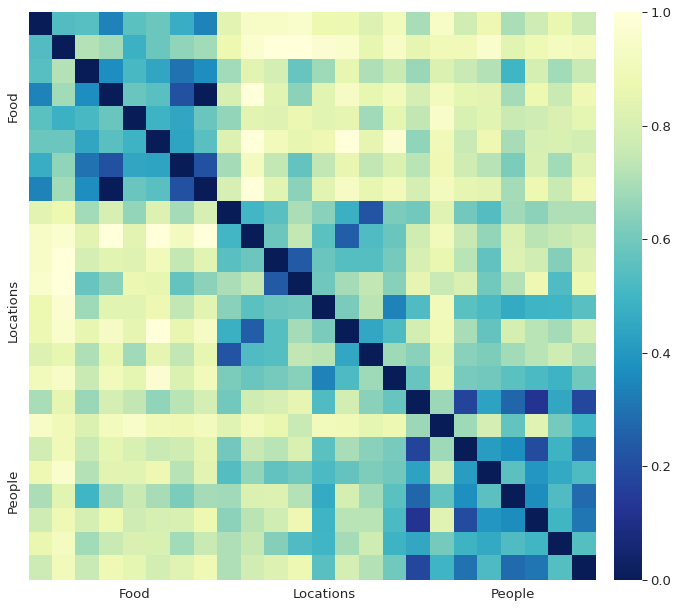

In [ ]:
import seaborn as sns
import matplotlib.pylab as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd


#setting up the heatmap
sns.set_theme(style="white")
sns.set_context(context='paper', font_scale=1.5)

f,ax = plt.subplots(figsize=(11, 11))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.25)
ax = sns.heatmap(vm, cmap='YlGnBu_r', vmin=0, vmax=1, xticklabels=xlabel, yticklabels=ylabel, square=True, ax=ax,cbar_ax=cax)

plt.savefig("SemanticmodelRDM.svg", dpi=300, transparent=True)

NameError: ignored

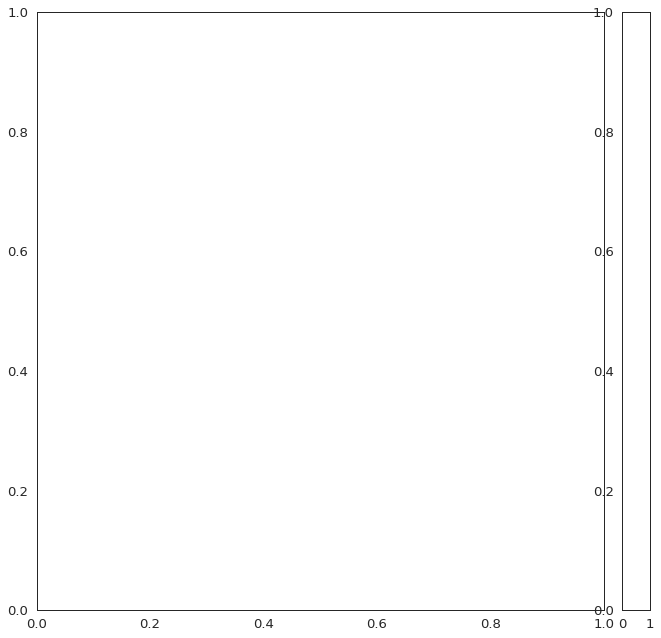

In [ ]:
import seaborn as sns
import matplotlib.pylab as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

#separate phonological heatmap
sns.set_theme(style="white")
sns.set_context(context='paper', font_scale=1.5)
fig,ax2 = plt.subplots(figsize=(11, 11))
labels = ['ɑ','a','b','d','ɛ','e','f','h','ɪ','j','k','ɛi','l','œy','m','ɔu','n','o','ɔ','p','r','s','t','v','w','x','y','z']

divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.25)
ax2 = sns.heatmap(pmatrix, cmap='YlGnBu_r', vmin=0, vmax=1, ax=ax2, xticklabels=labels, yticklabels=labels, square=True, cbar_ax=cax)
#ax2.collections[0].colorbar.set_label('Dissimilarity', rotation=270)

plt.savefig("PhonRDMmodel.png", transparent=True, dpi=300)

## Word condition: onsets and position

This section maps the words as early or late according to the pauses in the transcript. 

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving allphonemes.csv to allphonemes.csv
Saving earlywordinfo.csv to earlywordinfo.csv
Saving allfeatures.csv to allfeatures.csv


In [ ]:
import numpy as np
import pandas as pd


#read the audiobook parts into variables; to clean up make this a function with the variable text 

nlp = spacy.load("nl_core_news_lg")
text = '20grimm2.txt'
document = open(text).read()
doc = nlp(document)
fieldnames = ['word', 'position','sposition', 'condition', 'POS']
df = pd.DataFrame(columns=fieldnames)


position = 0 
relpos = 0 
sentence = 0 
oldsentence = 0
for i in doc: 
  if i.text != "P":
    sentence = sentence + 1 
    continue
  else:
    for j in doc:
      if j.text != "P":
        continue
      else:
        length = sentence
        sentence = oldsentence + sentence 
        for token in doc: 
          for x in range(oldsentence, sentence):
            relpos = relpos + 1   #relative position used to calculate the condition
            position = position + 1  #absolute position to be compared with previous file
            if relpos <= length / 2: index = 'early'
            else: index = 'late'
            myrow = {'sposition': relpos, 'condition': index, 'position': position}
            df = df.append(myrow, ignore_index=True)
            #print(myrow)
          break #bigger for loop 
        break #else loop  
      break #biggest for loop   
  oldsentence = sentence
  sentence = 0
  relpos = 0
  continue


Make sure to check that the words extracted from praat correspond exactly to the words in the text. This needs to be done manually as well as recoding the pauses from \<P> to P and removing all punctuation. 

Add words to position and condition dataframe. 

In [ ]:
a = 0
for i in doc: 
  if i.text != "P":
      df.loc[a,'word'] = i.text
      df.loc[a,'POS'] = i.pos_
      #print(df.loc[a,'word']) useful to check which words were parsed wrong
      a = a + 1
  else:
    continue

Add the word start and end times and the duration and filename and save only the nouns. 

In [ ]:
times = pd.read_csv('20grimm2.csv', sep=",", converters={'vector': eval}, encoding='latin-1')
df2 = times[['start', 'end', 'duration', 'file']] #comment this out to check the length of the extracted .csv
df = pd.concat([df, df2], axis=1)

times['word']

Extract nouns and save to csv.

In [ ]:
df3 = df[df.POS == 'NOUN']
df3.to_csv('20grimm2final.csv', index=False)

## Subject specific RDM

The previous section contained code generating generic model RDMs for the nouns present in all the texts. The following section contains code tailored to the word present in the finaldata for each subject and separated by condition. 

In [ ]:
# get subject specific order (download info .mat file)

import pandas as pd, scipy.io, numpy as np
from scipy.io import loadmat
from pandas.api.types import CategoricalDtype

info = loadmat('sub001_info.mat')

order_list = info['stimOrder']
newData = list(zip(order_list[:,0], order_list[:,1]))
columns = ['story', 'story_part']
order = pd.DataFrame(newData, columns=columns)
order1 = order.drop_duplicates(subset='story')

# order the sheet according to the subject and select the early and late word infos 

wi = pd.read_csv('/content/wordinfo.csv')

s = list(order1['story'])

cat_story_order = CategoricalDtype(s, ordered=True)   #create categories for easier sorting 
cat_part_order = CategoricalDtype([1, 2, 3, 4], ordered=True)

wi['story'] = wi['story'].astype(cat_story_order)
wi['story_part'] = wi['story_part'].astype(cat_part_order)

wi.sort_values(by=['story','story_part'], ignore_index=True, inplace=True)

wi.to_csv('sub001_wordinfo.csv', index=False) #change per subject

#save early and late words as separate variables and reset index

earlywordinfo = wi[wi['condition'] == 100]
latewordinfo = wi[wi['condition'] == 300]



The following code is needed instead if the stories are not ordered chronologically in the data

In [ ]:
import pandas as pd, scipy.io, numpy as np

wi = pd.read_csv('/content/wordinfo.csv') #maybe reset index to start from 1???
earlywordinfo = wi[wi['condition'] == 100]

#earlywordinfo.to_excel('early_words.xlsx') #to save to file; add counter to track in final matrix

latewordinfo = wi[wi['condition'] == 300]

#latewordinfo.to_excel('late_words.xlsx') #to save to file; add counter to track in final matrix

In [ ]:
feature_m

### Phonological RDM

In [ ]:
import csv, numpy as np

def createfeaturechart(wordinfo):
  #creates subject specific feature chart given the condition separated word info files
  df = wordinfo 
  df1 = pd.read_csv('/content/allphonemes.csv')
  df2 = pd.read_csv('/content/allfeatures.csv') #features have been vectorized already
  fm = pd.DataFrame(columns=['word','phoneme','consonantal', 'sonorant', 'syllabic', 'labial', 'round', 'coronal', 'anterior', 'distributed', 'dorsal', 'high', 'low', 'front', 'back', 'tense', 'pharyngeal', 'ATR',  'voice', 'spread.gl', 'constr.gl','continuant', 'strident', 'lateral', 'delayed.release', 'nasal', 'diphthong'])
  n = wordinfo.index     #n = df.shape[0] if using normal indices
  m = df1.shape[0]
  o = df2.shape[0]
  for i in n: 
    w = df.loc[i,'word']
    fm.loc[i,'word'] = w
    for j in range(m): 
      x = df1.loc[j,'Word']
      z = df1.loc[j,'IPAonset']
      if x == w:             
        fm.loc[i,'phoneme'] = z
        for k in range(o):
          y = df2.loc[k, 'Phoneme']
          if y == z:
            fm.loc[i,'consonantal':] = df2.loc[k,'consonantal':]
  return fm

feature_m = createfeaturechart(latewordinfo)


In [ ]:
def removewords(table):
  # remove words that don't exist
  index_with_nan = table.index[table.phoneme.isnull()]
  table.drop(index_with_nan,0, inplace=True)
  # remove useless features
  table = table.dropna(axis=1, how='all', inplace=True)
  index_with_nan = [x+1 for x in list(index_with_nan)]
  print(index_with_nan)
  return table
  

removewords(feature_m)

feature_m

[8, 13, 14, 23, 44, 66, 71, 106, 108, 112, 116, 122, 134, 137, 138, 153, 174, 199, 202, 211, 221, 236, 240, 255, 256, 275, 296, 298, 333, 366, 383, 387, 403, 424, 432, 446, 477, 490, 507, 511, 514, 521, 545, 546, 549, 586, 590, 601, 602, 612, 620, 630, 637, 651, 659, 678, 682, 683, 714, 720, 723, 724, 737, 795, 828, 831, 885, 929, 940, 948, 965, 967, 1027, 1051, 1062, 1112, 1117, 1119, 1121, 1137, 1186, 1198, 1207, 1217, 1222, 1230, 1233, 1237, 1244, 1250, 1251, 1295, 1320, 1326, 1327, 1329, 1331, 1333]


,word,phoneme,consonantal,sonorant,syllabic,labial,round,coronal,anterior,distributed,dorsal,high,low,front,back,tense,pharyngeal,ATR,voice,spread.gl,continuant,strident,lateral,nasal,diphthong
0,land,l,1,1,0.5,0.5,0,1,1,0.5,0.5,0,0,0,0,0,0.5,0,1,0.5,1,0.5,1,0.5,0
2,koren,k,1,0.5,0.5,0.5,0,0.5,0,0,1,1,0.5,0.5,1,0.5,0.5,0,0.5,0.5,0.5,0.5,0.5,0.5,0
6,ooievaar,o,0.5,1,1,1,1,0.5,0,0,1,0.5,0.5,0.5,1,1,1,1,1,0.5,1,0.5,0.5,0.5,0.5
9,moeder,m,1,1,0.5,1,0.5,0.5,0,0,0.5,0,0,0,0,0,0.5,0,1,0.5,0.5,0.5,0.5,1,0
14,meren,m,1,1,0.5,1,0.5,0.5,0,0,0.5,0,0,0,0,0,0.5,0,1,0.5,0.5,0.5,0.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,macht,m,1,1,0.5,1,0.5,0.5,0,0,0.5,0,0,0,0,0,0.5,0,1,0.5,0.5,0.5,0.5,1,0
1324,kop,k,1,0.5,0.5,0.5,0,0.5,0,0,1,1,0.5,0.5,1,0.5,0.5,0,0.5,0.5,0.5,0.5,0.5,0.5,0
1327,vos,v,1,0.5,0.5,1,0.5,0.5,0,0,0.5,0,0,0,0,0,0.5,0,1,0.5,1,1,0.5,0.5,0
1331,koningsdochter,k,1,0.5,0.5,0.5,0,0.5,0,0,1,1,0.5,0.5,1,0.5,0.5,0,0.5,0.5,0.5,0.5,0.5,0.5,0


Before the final matrix can be generated, trials which were deleted during the cleaning process need to be removed.

In [ ]:
def deletetrials(trls, table):
  # remove deleted trials
  table.drop(trls,0, inplace=True)
  return table

trials = [223,648,852,903,946,1132,1211] #change to get all the deleted trials; change name 
feature_m = deletetrials(trials,feature_m)

#print(list(index_with_nan))

In [ ]:
import numpy as np, pandas as pd, scipy.io

z = feature_m.shape[0]
df = feature_m.loc[:,'consonantal':]
data = df.values
n = data.shape[0]
N = n*(n-1)//2
idx = np.concatenate(( [0], np.arange(n-1,0,-1).cumsum() ))
start, stop = idx[:-1], idx[1:]
out = np.empty((N,data.shape[1]+2),dtype=int)
for j,i in enumerate(range(n-1)):
    s0,s1 = start[j],stop[j]
    out[s0:s1,:-2] = data[i,None] == data[i+1:]
    out[s0:s1,-2] = j
    out[s0:s1,-1] = np.arange(j+1,n)

#creates array out where each row represents the comparison of one segment's features with the other

matrix = pd.DataFrame(out[:,:-2])
segment1 = pd.DataFrame(out[:,-2])
segment2 = pd.DataFrame(out[:,-1])
matrix.columns = (['consonantal', 'sonorant', 'syllabic', 'labial', 'round', 'coronal', 'anterior', 'distributed', 'dorsal', 'high', 'low', 'front', 'back', 'tense', 'pharyngeal', 'ATR', 'voice', 'spread.gl', 'continuant', 'strident', 'lateral', 'nasal','diphthong']) 

#each line logs whether or not the cells are the same 
m_sum = matrix.sum(axis=1, skipna=False)

matrix['segment 1'] = segment1
matrix['segment 2'] = segment2
matrix['dissimilarity'] = 1 - (m_sum/ data.shape[1])

pmatrix = np.zeros((z,z)) #changes for each subject  

m = matrix.values
m = m[:,23:]
n = m.shape[0]

for k in range(n):
  i = int(m[k,0])
  j = int(m[k,1])
  h = m[k,2]
  pmatrix[i,j] = h
  pmatrix[j,i] = pmatrix[i,j]

pmatrix
scipy.io.savemat('late_pmatrix.mat', mdict={'pmatrix': pmatrix})     #final phon RDM          

In [ ]:
a = pd.DataFrame(pmatrix)
a

### Semantic RDM

In [ ]:
import pandas as pd, csv, numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def createsemrdm(wordinfo):
  df = wordinfo
  df2 = pd.read_csv('/content/allvectors.csv', sep=",", converters={'vector': eval})
  vector_m = pd.DataFrame(columns=['word','vector'])
  n = wordinfo.index
  m = df2.shape[0]
  for i in n: 
    w = df.loc[i,'word']
    vector_m.loc[i,'word'] = w
    for j in range(m): 
        x = df2.loc[j,'word']
        if x == w:
            v = df2.loc[j,'vector']
            vector_m.loc[i,'vector'] = v
  return vector_m

vector_m = createsemrdm(latewordinfo)

# remove words that don't exist
index_with_nan = vector_m.index[vector_m.vector.isnull()]
vector_m.drop(index_with_nan,0, inplace=True)
index_with_nan = [x+1 for x in list(index_with_nan)]
#print(index_with_nan)
#vector_m.to_excel('earlysemRDM.xlsx') #to save to file; 



In [ ]:
#remove deleted trials 
vector_m = deletetrials(trials,vector_m)

In [ ]:
data = np.zeros((z,300))
vector_m.reset_index(drop=True, inplace=True)

for i in vector_m.index:
  u = vector_m.loc[i,'vector']
  data[i] = np.asarray(u)
  

vmatrix = 1 - cosine_similarity(data)

In [ ]:
vmatrix

In [ ]:
scipy.io.savemat('late_vmatrix.mat', mdict={'vmatrix': vmatrix})

# Random code snippets 

In [ ]:
%dhist
#%cd ..
#print(word)
#print(words)

#t = token.vector



#%rm -rf prosodic1b




Directory history (kept in _dh)
0: /content
1: /content/prosodic1b
/content


# Additional scripts

This section contains any scripts which have been modified or amended or are needed to run any of the previous sections. These need to be saved to a file and uploaded to the necessary repositories. 

## Modipa.py

In [ ]:
# -*- coding: UTF-8 -*-

import re

# Feature system taken from Riggle(2013); Code adapted from Falk(2015)

ipa_to_features = {}


all_features = ['consonantal', 'sonorant', 'syllabic', 'labial', 'round', 'coronal', 'anterior', 'distributed', 'dorsal', 'high', 'low', 'front', 'back', 'tense', 'pharyngeal', 'ATR',  'voice', 'spread.gl', 'constr.gl','continuant', 'strident', 'lateral', 'delayed.release', 'nasal', 'diphthong']

#the diphthong feature is one that has been added for the sake of simply representing all the vowels present in the audiobooks


##############
# Consonants #
##############

consonant_features = ['consonantal', 'sonorant', 'syllabic', 'labial', 'round', 'coronal', 'anterior', 'distributed', 'dorsal', 'high', 'low', 'front', 'back', 'tense', 'pharyngeal', 'ATR',  'voice', 'spread.gl', 'constr.gl','continuant', 'strident', 'lateral', 'delayed.release', 'nasal', 'diphthong']
#same as all but there's a bug in the code if I don't do the if condition for the features


# labial obstruents
ipa_to_features[u'p'] = {'consonantal': True, 'sonorant': False, 'syllabic': False, 'labial': True, 'round': False, 'coronal': False, 'anterior': None, 'distributed': None, 'dorsal': False, 'high': None, 'low': None, 'front': None, 'back': None, 'tense': None, 'pharyngeal': False, 'ATR': None, 'voice': False, 'spread.gl': False, 'constr.gl': False, 'continuant': False, 'strident': False, 'lateral': False, 'delayed.release': False, 'nasal': False, 'diphthong': None}
ipa_to_features[u'b'] = {'consonantal': True, 'sonorant': False, 'syllabic': False, 'labial': True, 'round': False, 'coronal': False, 'anterior': None, 'distributed': None, 'dorsal': False, 'high': None, 'low': None, 'front': None, 'back': None, 'tense': None, 'pharyngeal': False, 'ATR': None, 'voice': True, 'spread.gl': False, 'constr.gl': False, 'continuant': False, 'strident': False, 'lateral': False, 'delayed.release': False, 'nasal': False, 'diphthong': None}
ipa_to_features[u'f'] = {'consonantal': True, 'sonorant': False, 'syllabic': False, 'labial': True, 'round': False, 'coronal': False, 'anterior': None, 'distributed': None, 'dorsal': False, 'high': None, 'low': None, 'front': None, 'back': None, 'tense': None, 'pharyngeal': False, 'ATR': None, 'voice': False, 'spread.gl': False, 'constr.gl': False, 'continuant': True, 'strident': True, 'lateral': False, 'delayed.release': False, 'nasal': False, 'diphthong': None}
ipa_to_features[u'v'] = {'consonantal': True, 'sonorant': False, 'syllabic': False, 'labial': True, 'round': False, 'coronal': False, 'anterior': None, 'distributed': None, 'dorsal': False, 'high': None, 'low': None, 'front': None, 'back': None, 'tense': None, 'pharyngeal': False, 'ATR': None, 'voice': True, 'spread.gl': False, 'constr.gl': False, 'continuant': True, 'strident': True, 'lateral': False, 'delayed.release': False, 'nasal': False, 'diphthong': None}

# coronal obstruents
ipa_to_features[u't'] = {'consonantal': True, 'sonorant': False, 'syllabic': False, 'labial': False, 'round': None, 'coronal': True, 'anterior': True, 'distributed': False, 'dorsal': False, 'high': None, 'low': None, 'front': None, 'back': None, 'tense': None, 'pharyngeal': False, 'ATR': None, 'voice': False, 'spread.gl': False, 'constr.gl': False, 'continuant': False, 'strident': False, 'lateral': False, 'delayed.release': False, 'nasal': False, 'diphthong': None}
ipa_to_features[u'd'] = {'consonantal': True, 'sonorant': False, 'syllabic': False, 'labial': False, 'round': None, 'coronal': True, 'anterior': True, 'distributed': False, 'dorsal': False, 'high': None, 'low': None, 'front': None, 'back': None, 'tense': None, 'pharyngeal': False, 'ATR': None, 'voice': True, 'spread.gl': False, 'constr.gl': False, 'continuant': False, 'strident': False, 'lateral': False, 'delayed.release': False, 'nasal': False, 'diphthong': None}
ipa_to_features[u's'] = {'consonantal': True, 'sonorant': False, 'syllabic': False, 'labial': False, 'round': None, 'coronal': True, 'anterior': True, 'distributed': False, 'dorsal': False, 'high': None, 'low': None, 'front': None, 'back': None, 'tense': None, 'pharyngeal': False, 'ATR': None, 'voice': False, 'spread.gl': False, 'constr.gl': False, 'continuant': True, 'strident': True, 'lateral': False, 'delayed.release': False, 'nasal': False, 'diphthong': None}
ipa_to_features[u'z'] = {'consonantal': True, 'sonorant': False, 'syllabic': False, 'labial': False, 'round': None, 'coronal': True, 'anterior': True, 'distributed': False, 'dorsal': False, 'high': None, 'low': None, 'front': None, 'back': None, 'tense': None, 'pharyngeal': False, 'ATR': None, 'voice': True, 'spread.gl': False, 'constr.gl': False, 'continuant': True, 'strident': True, 'lateral': False, 'delayed.release': False, 'nasal': False, 'diphthong': None}

#liquids and nasals
ipa_to_features[u'm'] = {'consonantal': True, 'sonorant': True, 'syllabic': False, 'labial': True, 'round': False, 'coronal': False, 'anterior': None, 'distributed': None, 'dorsal': False, 'high': None, 'low': None, 'front': None, 'back': None, 'tense': None, 'pharyngeal': False, 'ATR': None, 'voice': True, 'spread.gl': False, 'constr.gl': False, 'continuant': False, 'strident': False, 'lateral': False, 'delayed.release': False, 'nasal': True, 'diphthong': None}
ipa_to_features[u'n'] = {'consonantal': True, 'sonorant': True, 'syllabic': False, 'labial': False, 'round': None, 'coronal': True, 'anterior': True, 'distributed': False, 'dorsal': False, 'high': None, 'low': None, 'front': None, 'back': None, 'tense': None, 'pharyngeal': False, 'ATR': None, 'voice': True, 'spread.gl': False, 'constr.gl': False, 'continuant': False, 'strident': False, 'lateral': False, 'delayed.release': False, 'nasal': True, 'diphthong': None}
ipa_to_features[u'l'] = {'consonantal': True, 'sonorant': True, 'syllabic': False, 'labial': False, 'round': None, 'coronal': True, 'anterior': True, 'distributed': False, 'dorsal': False, 'high': None, 'low': None, 'front': None, 'back': None, 'tense': None, 'pharyngeal': False, 'ATR': None, 'voice': True, 'spread.gl': False, 'constr.gl': False, 'continuant': True, 'strident': False, 'lateral': True, 'delayed.release': False, 'nasal': False, 'diphthong': None}
ipa_to_features[u'r'] = {'consonantal': True, 'sonorant': True, 'syllabic': False, 'labial': False, 'round': None, 'coronal': True, 'anterior': True, 'distributed': False, 'dorsal': False, 'high': None, 'low': None, 'front': None, 'back': None, 'tense': None, 'pharyngeal': False, 'ATR': None, 'voice': True, 'spread.gl': False, 'constr.gl': False, 'continuant': True, 'strident': False, 'lateral': False, 'delayed.release': False, 'nasal': False, 'diphthong': None}
#maybe reinsert a trill feature?


# glides
ipa_to_features[u'j'] = {'consonantal': False, 'sonorant': True, 'syllabic': False, 'labial': False, 'round': False, 'coronal': False, 'anterior': None, 'distributed': None, 'dorsal': True, 'high': True, 'low': False, 'front': False, 'back': False, 'tense': False, 'pharyngeal': False, 'ATR': None, 'voice': True, 'spread.gl': False, 'constr.gl': False, 'continuant': True, 'strident': False, 'lateral': False, 'delayed.release': False, 'nasal': False, 'diphthong': None}
ipa_to_features[u'w'] = {'consonantal': False, 'sonorant': True, 'syllabic': False, 'labial': True, 'round': True, 'coronal': False, 'anterior': None, 'distributed': None, 'dorsal': True, 'high': True, 'low': False, 'front': False, 'back': True, 'tense': False, 'pharyngeal': False, 'ATR': None, 'voice': True, 'spread.gl': False, 'constr.gl': False, 'continuant': True, 'strident': False, 'lateral': False, 'delayed.release': False, 'nasal': False, 'diphthong': None}

# dorsal obstruents
ipa_to_features[u'k'] = {'consonantal': True, 'sonorant': False, 'syllabic': False, 'labial': False, 'round': None, 'coronal': False, 'anterior': None, 'distributed': None, 'dorsal': True, 'high': True, 'low': False, 'front': False, 'back': True, 'tense': False, 'pharyngeal': False, 'ATR': None, 'voice': False, 'spread.gl': False, 'constr.gl': False, 'continuant': False, 'strident': False, 'lateral': False, 'delayed.release': False, 'nasal': False, 'diphthong': None}
ipa_to_features[u'x'] = {'consonantal': True, 'sonorant': False, 'syllabic': False, 'labial': False, 'round': None, 'coronal': False, 'anterior': None, 'distributed': None, 'dorsal': True, 'high': True, 'low': False, 'front': False, 'back': True, 'tense': False, 'pharyngeal': False, 'ATR': None, 'voice': False, 'spread.gl': False, 'constr.gl': False, 'continuant': True, 'strident': False, 'lateral': False, 'delayed.release': False, 'nasal': False, 'diphthong': None}

# laryngeals
ipa_to_features[u'h'] = {'consonantal': False, 'sonorant': False, 'syllabic': False, 'labial': False, 'round': None, 'coronal': False, 'anterior': None, 'distributed': None, 'dorsal': False, 'high': None, 'low': None, 'front': None, 'back': None, 'tense': None, 'pharyngeal': False, 'ATR': None, 'voice': False, 'spread.gl': True, 'constr.gl': False, 'continuant': True, 'strident': False, 'lateral': False, 'delayed.release': False, 'nasal': False, 'diphthong': None}


##########
# Vowels #
##########

vowel_features = ['consonantal', 'sonorant', 'syllabic', 'labial', 'round', 'coronal', 'anterior', 'distributed', 'dorsal', 'high', 'low', 'front', 'back', 'tense', 'pharyngeal', 'ATR',  'voice', 'spread.gl', 'constr.gl','continuant', 'strident', 'lateral', 'delayed.release', 'nasal', 'diphthong']


# high tense
ipa_to_features[u'y'] = {'consonantal': False, 'sonorant': True, 'syllabic': True, 'labial': True, 'round': True, 'coronal': False, 'anterior': None, 'distributed': None, 'dorsal': True, 'high': True, 'low': False, 'front': True, 'back': False, 'tense': True, 'pharyngeal': True, 'ATR': True, 'voice': True, 'spread.gl': False, 'constr.gl': False, 'continuant': True, 'strident': False, 'lateral': False, 'delayed.release': False, 'nasal': False, 'diphthong': False}
ipa_to_features[u'u'] = {'consonantal': False, 'sonorant': True, 'syllabic': True, 'labial': True, 'round': True, 'coronal': False, 'anterior': None, 'distributed': None, 'dorsal': True, 'high': True, 'low': False, 'front': False, 'back': True, 'tense': True, 'pharyngeal': True, 'ATR': True, 'voice': True, 'spread.gl': False, 'constr.gl': False, 'continuant': True, 'strident': False, 'lateral': False, 'delayed.release': False, 'nasal': False, 'diphthong': False}

# high lax
ipa_to_features[u'ɪ'] = {'consonantal': False, 'sonorant': True, 'syllabic': True, 'labial': True, 'round': False, 'coronal': False, 'anterior': None, 'distributed': None, 'dorsal': True, 'high': True, 'low': False, 'front': True, 'back': False, 'tense': False, 'pharyngeal': True, 'ATR': False, 'voice': True, 'spread.gl': False, 'constr.gl': False, 'continuant': True, 'strident': False, 'lateral': False, 'delayed.release': False, 'nasal': False, 'diphthong': False}

# mid tense
ipa_to_features[u'e'] = {'consonantal': False, 'sonorant': True, 'syllabic': True, 'labial': True, 'round': False, 'coronal': False, 'anterior': None, 'distributed': None, 'dorsal': True, 'high': False, 'low': False, 'front': True, 'back': False, 'tense': True, 'pharyngeal': True, 'ATR': True, 'voice': True, 'spread.gl': False, 'constr.gl': False, 'continuant': True, 'strident': False, 'lateral': False, 'delayed.release': False, 'nasal': False, 'diphthong': False}
ipa_to_features[u'o'] = {'consonantal': False, 'sonorant': True, 'syllabic': True, 'labial': True, 'round': True, 'coronal': False, 'anterior': None, 'distributed': None, 'dorsal': True, 'high': False, 'low': False, 'front': False, 'back': True, 'tense': True, 'pharyngeal': True, 'ATR': True, 'voice': True, 'spread.gl': False, 'constr.gl': False, 'continuant': True, 'strident': False, 'lateral': False, 'delayed.release': False, 'nasal': False, 'diphthong': False}

# mid lax
ipa_to_features[u'ɛ'] = {'consonantal': False, 'sonorant': True, 'syllabic': True, 'labial': True, 'round': False, 'coronal': False, 'anterior': None, 'distributed': None, 'dorsal': True, 'high': False, 'low': False, 'front': True, 'back': False, 'tense': False, 'pharyngeal': True, 'ATR': False, 'voice': True, 'spread.gl': False, 'constr.gl': False, 'continuant': True, 'strident': False, 'lateral': False, 'delayed.release': False, 'nasal': False, 'diphthong': False}
ipa_to_features[u'œ'] = {'consonantal': False, 'sonorant': True, 'syllabic': True, 'labial': True, 'round': True, 'coronal': False, 'anterior': None, 'distributed': None, 'dorsal': True, 'high': False, 'low': False, 'front': True, 'back': False, 'tense': False, 'pharyngeal': True, 'ATR': False, 'voice': True, 'spread.gl': False, 'constr.gl': False, 'continuant': True, 'strident': False, 'lateral': False, 'delayed.release': False, 'nasal': False, 'diphthong': False}
ipa_to_features[u'ɔ'] = {'consonantal': False, 'sonorant': True, 'syllabic': True, 'labial': True, 'round': True, 'coronal': False, 'anterior': None, 'distributed': None, 'dorsal': True, 'high': False, 'low': False, 'front': False, 'back': True, 'tense': False, 'pharyngeal': True, 'ATR': False, 'voice': True, 'spread.gl': False, 'constr.gl': False, 'continuant': True, 'strident': False, 'lateral': False, 'delayed.release': False, 'nasal': False, 'diphthong': False}

# low
ipa_to_features[u'a'] = {'consonantal': False, 'sonorant': True, 'syllabic': True, 'labial': True, 'round': False, 'coronal': False, 'anterior': None, 'distributed': None, 'dorsal': True, 'high': False, 'low': True, 'front': False, 'back': False, 'tense': False, 'pharyngeal': True, 'ATR': False, 'voice': True, 'spread.gl': False, 'constr.gl': False, 'continuant': True, 'strident': False, 'lateral': False, 'delayed.release': False, 'nasal': False, 'diphthong': False}
ipa_to_features[u'ɑ'] = {'consonantal': False, 'sonorant': True, 'syllabic': True, 'labial': True, 'round': False, 'coronal': False, 'anterior': None, 'distributed': None, 'dorsal': True, 'high': False, 'low': True, 'front': False, 'back': True, 'tense': False, 'pharyngeal': True, 'ATR': False, 'voice': True, 'spread.gl': False, 'constr.gl': False, 'continuant': True, 'strident': False, 'lateral': False, 'delayed.release': False, 'nasal': False, 'diphthong': False}

# diphthong
ipa_to_features[u'ɛi'] = {'consonantal': False, 'sonorant': True, 'syllabic': True, 'labial': True, 'round': False, 'coronal': False, 'anterior': None, 'distributed': None, 'dorsal': True, 'high': False, 'low': False, 'front': True, 'back': False, 'tense': False, 'pharyngeal': True, 'ATR': False, 'voice': True, 'spread.gl': False, 'constr.gl': False, 'continuant': True, 'strident': False, 'lateral': False, 'delayed.release': False, 'nasal': False, 'diphthong': True}
ipa_to_features[u'œy'] = {'consonantal': False, 'sonorant': True, 'syllabic': True, 'labial': True, 'round': True, 'coronal': False, 'anterior': None, 'distributed': None, 'dorsal': True, 'high': False, 'low': False, 'front': True, 'back': False, 'tense': False, 'pharyngeal': True, 'ATR': False, 'voice': True, 'spread.gl': False, 'constr.gl': False, 'continuant': True, 'strident': False, 'lateral': False, 'delayed.release': False, 'nasal': False, 'diphthong': True}
ipa_to_features[u'ɔu'] = {'consonantal': False, 'sonorant': True, 'syllabic': True, 'labial': True, 'round': True, 'coronal': False, 'anterior': None, 'distributed': None, 'dorsal': True, 'high': False, 'low': False, 'front': False, 'back': True, 'tense': False, 'pharyngeal': True, 'ATR': False, 'voice': True, 'spread.gl': False, 'constr.gl': False, 'continuant': True, 'strident': False, 'lateral': False, 'delayed.release': False, 'nasal': False, 'diphthong': True}



#all_features = set(consonant_features + vowel_features)

value_map = {'+': True, '-': False, '0': None}
reverse_value_map = {True: '+', False: '-', None: '0'}

# Split a combined feature and value into separate parts
# E.g. "+sonorant" -> ("sonorant", True)
def split_feature_and_value(feature):
	if len(feature) < 1:
		return None
	value = feature[0]
	if value not in value_map:
		return None
	value = value_map[value]
	feature = feature[1:]
	if feature not in all_features:
		return None
	return (feature, value)

# combine a feature and a value into one representation
# E.g. ("sonorant", True) -> "+sonorant"
def combine_feature_and_value(feature, value):
	if value not in reverse_value_map:
		return None
	return reverse_value_map[value] + feature

# Note: this may need to change if the feature system is modified
def is_vowel(phoneme):
	return 'consonantal' not in ipa_to_features[phoneme]

def is_consonant(phoneme):
	return not is_vowel(phoneme)

def phoneme_feature_string(phoneme):
	if phoneme not in ipa_to_features:
		return None
	features = all_features
	feature_value_pairs = [(feature, ipa_to_features[phoneme][feature]) for feature in features]
	return ", ".join([combine_feature_and_value(feature, value) for feature, value in feature_value_pairs if value != None])

def get_natural_class(features):
	features = re.findall('\s*([^\s]+)\s*', features, re.UNICODE)
	result = set(ipa_to_features.keys())
	for feature in features:
		matches = set()
		split = split_feature_and_value(feature)
		if split == None:
			print("Invalid feature: " + feature)
			return set()
		feature, value = split
		for phoneme in ipa_to_features:
			feature_values = ipa_to_features[phoneme]
			if feature in feature_values and feature_values[feature] == value:
				matches.add(phoneme)		
		result = result.intersection(matches)
	return result